# Code to plot SI2 - SI6

In [1]:
## imports (generic)
import warnings
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

## generate settings for file path

In [2]:
## input data 
path_data = '../data/'
## set path for storing the figure made by this file
path_fig = '../fig/'

## define plot function

In [4]:
# plot function
 ## optional plot (to be refined!)
def plot_calib(y_ref, y_mod):
    plt.style.use('seaborn-v0_8-colorblind')
    # Calculate RMSE
    rmse = np.sqrt(np.mean((y_ref - y_mod) ** 2))
    # Calculate R²
    ss_res = np.sum((y_ref - y_mod) ** 2)  # Residual sum of squares
    ss_tot = np.sum((y_ref - np.mean(y_ref)) ** 2)  # Total sum of squares
    r2 = 1 - (ss_res / ss_tot)
    nrmse = rmse / (y_ref.max() - y_ref.min())
    ## plot data
    plt.plot(y_ref.year, y_ref, marker='+', ls='none', ms=4, alpha=0.8)
    # Check if y_ref is not None and contains non-zero and non-NaN values
    for scen in y_ref['scen']:
        if y_ref.notnull().any() and (y_ref.sum() > 0):
            # Plot y_mod for the scenario if y_ref has valid data
            plt.plot(y_ref.year, y_mod.sel({'scen': scen}), color='k', lw=1, ls='-')
    ## axis
    plt.xticks(fontsize='x-small')
    plt.yticks(fontsize='x-small')
    ## legend
    #plot_ax.xaxis.set_label_position('top')
    ## legend (metrics)
    for name, val in zip(['NRMSE', 'R2'], [nrmse, r2]): 
        plt.plot([np.nan], [np.nan], label='{0} = {1:.3f}'.format(name, val))
    plt.legend(loc=0, ncol=1, handlelength=0, handletextpad=0, borderpad=0.2, labelspacing=0.2, frameon=False, fontsize='small')

## read in data

In [5]:
# prepare the data
TMP = xr.open_dataset(path_data + 'ds_SI2-6.nc')
ds = TMP.copy(deep=True)
ds

<xarray.Dataset>
Dimensions:   (scen: 6, year: 439, region: 4, model: 5)
Coordinates:
  * scen      (scen) object 'historical' 'historical-bgc' ... 'rcp26' 'rcp85'
  * year      (year) int64 1861 1862 1863 1864 1865 ... 2295 2296 2297 2298 2299
  * region    (region) object 'North America (permafrost)' ... 'Eurasia (non-...
  * model     (model) object 'LPJ' 'LPX' ... 'LPJ-GUESS_multiLayer' 'ORCHIDEE'
Data variables:
    npp_ref   (year, region, model, scen) float32 ...
    npp_mod   (year, region, model, scen) float32 ...
    Treg_ref  (year, region, model, scen) float32 ...
    Treg_mod  (year, region, model, scen) float32 ...
    mu_ref    (year, region, model, scen) float32 ...
    mu_mod    (year, region, model, scen) float32 ...
    rho_ref   (year, region, model, scen) float32 ...
    rho_mod   (year, region, model, scen) float32 ...
    fch4_ref  (year, region, model, scen) float32 ...
    fch4_mod  (year, region, model, scen) float32 ...

## plot SI2 - temperature

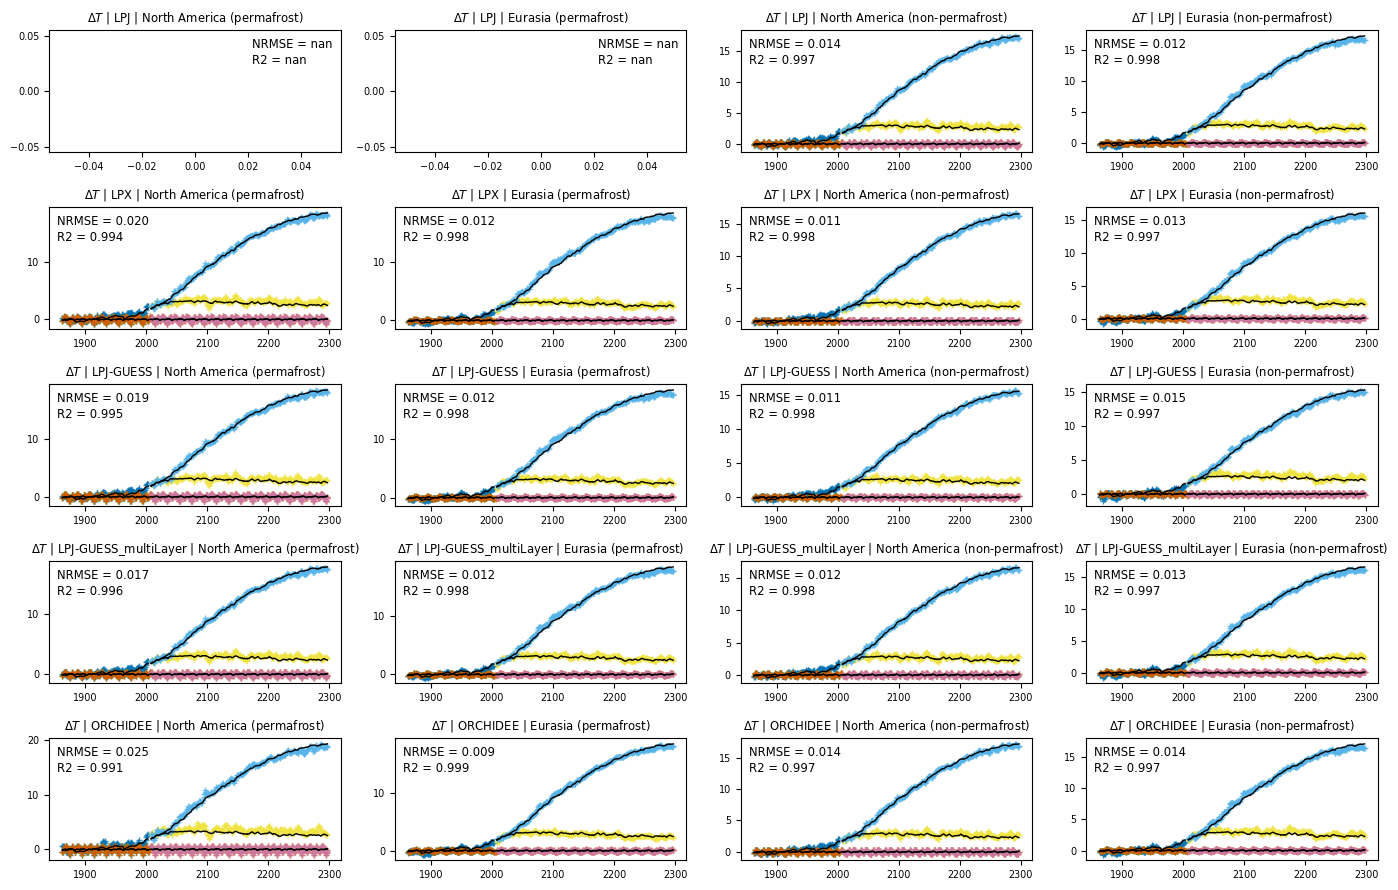

In [8]:
# plot calib for local tempeature change (delta T)
plt.figure(figsize=(14,9))
for m, mod in enumerate(ds.model):
    for r, reg in enumerate(ds.region):
        y_ref = ds.Treg_ref.sel(model=mod, region=reg)
        y_mod = ds.Treg_mod.sel(model=mod, region=reg)
        ax = plt.subplot2grid((len(ds.model), len(ds.region)), (m, r))
        plot_calib(y_ref, y_mod)
        plt.title(r'$\Delta T$ | {0} | {1}'.format(mod.values, reg.values), fontsize='small')
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.30, hspace=0.50)
plt.tight_layout()
plt.savefig(path_fig + 'figure_SI2.png', dpi=300)
# save as pdf
plt.savefig(path_fig + 'figure_SI2.pdf', dpi=300)

## plot SI3 - npp

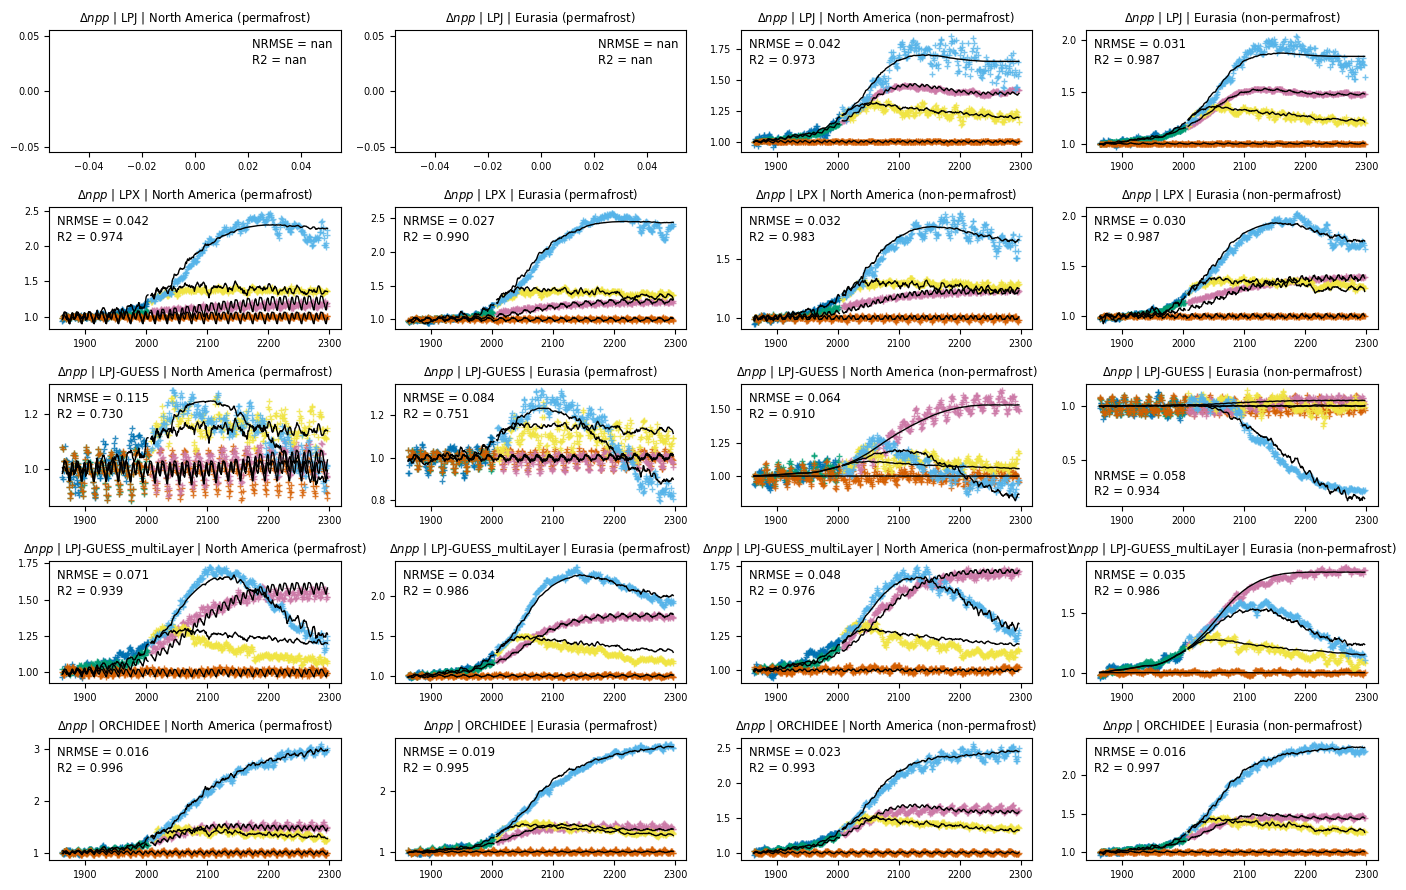

In [9]:
# plot calib for npp
plt.figure(figsize=(14,9))
for m, mod in enumerate(ds.model):
    for r, reg in enumerate(ds.region):
        y_ref = ds.npp_ref.sel(model=mod, region=reg)
        y_mod = ds.npp_mod.sel(model=mod, region=reg)
        ax = plt.subplot2grid((len(ds.model), len(ds.region)), (m, r))
        plot_calib(y_ref, y_mod)
        plt.title(r'$\Delta npp$ | {0} | {1}'.format(mod.values, reg.values), fontsize='small')
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.30, hspace=0.50)
plt.tight_layout()
plt.savefig(path_fig + 'figure_SI3.png', dpi=300)
# save as pdf
plt.savefig(path_fig + 'figure_SI3.pdf', dpi=300)

## plot SI4 - rho

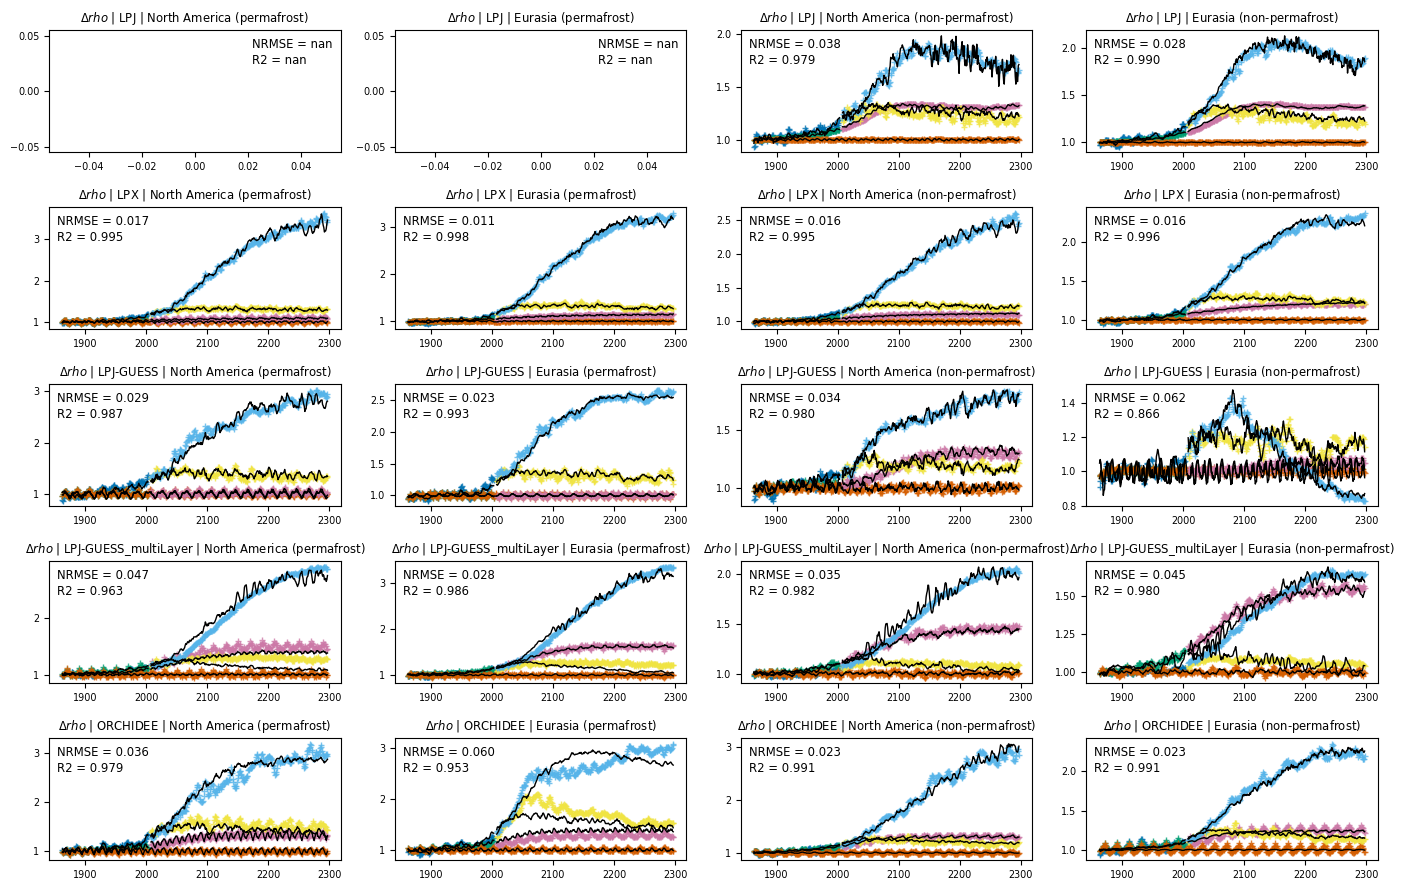

In [10]:
# plot for rho
plt.figure(figsize=(14,9))
for m, mod in enumerate(ds.model):
    for r, reg in enumerate(ds.region):
        y_ref = ds.rho_ref.sel(model=mod, region=reg)
        y_mod = ds.rho_mod.sel(model=mod, region=reg)
        ax = plt.subplot2grid((len(ds.model), len(ds.region)), (m, r))
        plot_calib(y_ref, y_mod)
        plt.title(r'$\Delta rho$ | {0} | {1}'.format(mod.values, reg.values), fontsize='small')
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.30, hspace=0.50)
plt.tight_layout()
plt.savefig(path_fig + 'figure_SI4.png', dpi=300)
# save as pdf
plt.savefig(path_fig + 'figure_SI4.pdf', dpi=300)

## plot SI5 - 𝜇

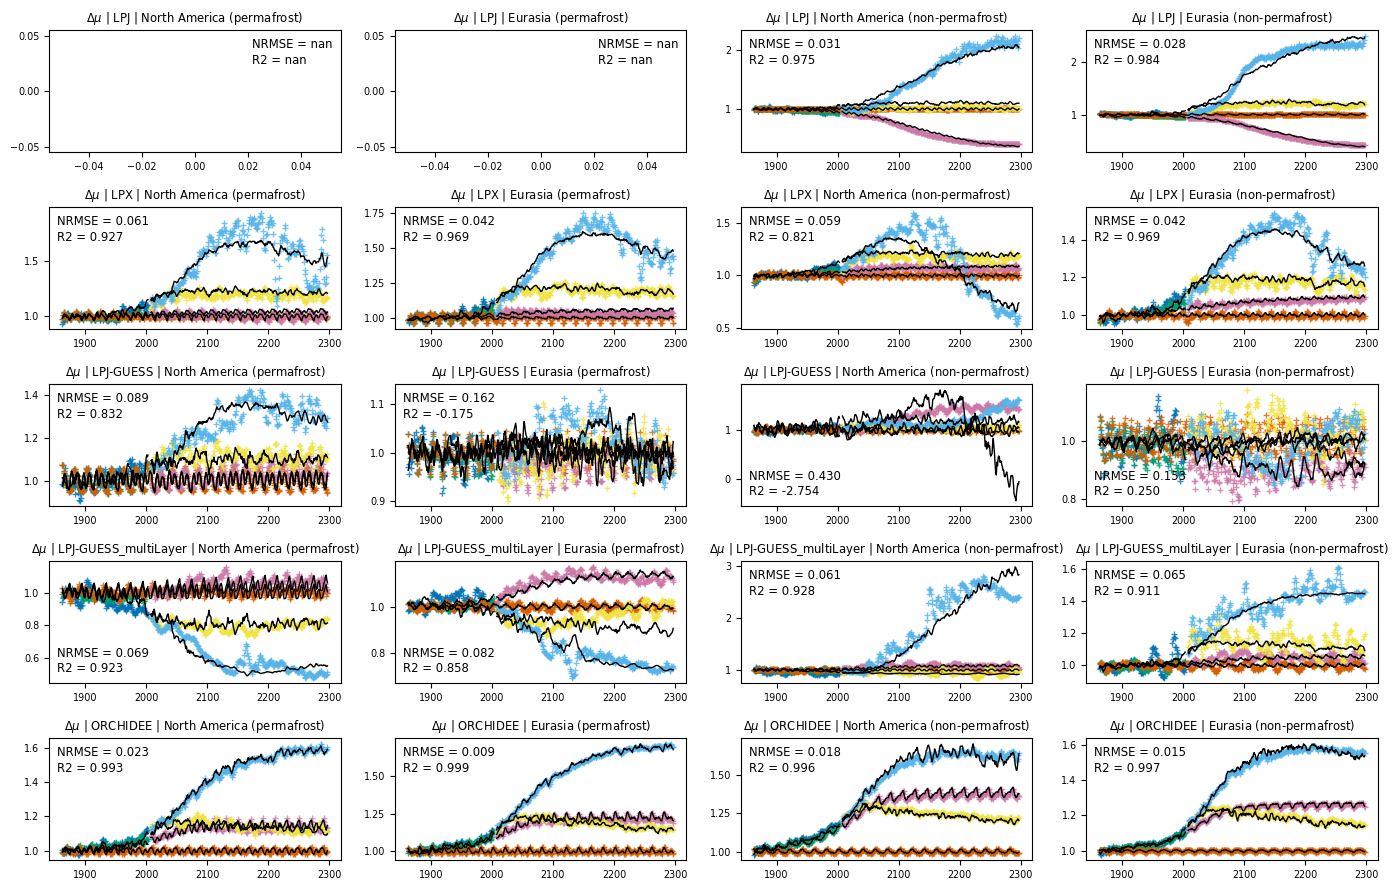

In [11]:
# plot for mu
plt.figure(figsize=(14,9))
for m, mod in enumerate(ds.model):
    for r, reg in enumerate(ds.region):
        y_ref = ds.mu_ref.sel(model=mod, region=reg)
        y_mod = ds.mu_mod.sel(model=mod, region=reg)
        ax = plt.subplot2grid((len(ds.model), len(ds.region)), (m, r))
        plot_calib(y_ref, y_mod)
        plt.title(r'$\Delta \mu$ | {0} | {1}'.format(mod.values, reg.values), fontsize='small')
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.30, hspace=0.50)
plt.tight_layout()
plt.savefig(path_fig + 'figure_SI5.png', dpi=300)
# save as pdf
plt.savefig(path_fig + 'figure_SI5.pdf', dpi=300)

## plot SI6 - fmet

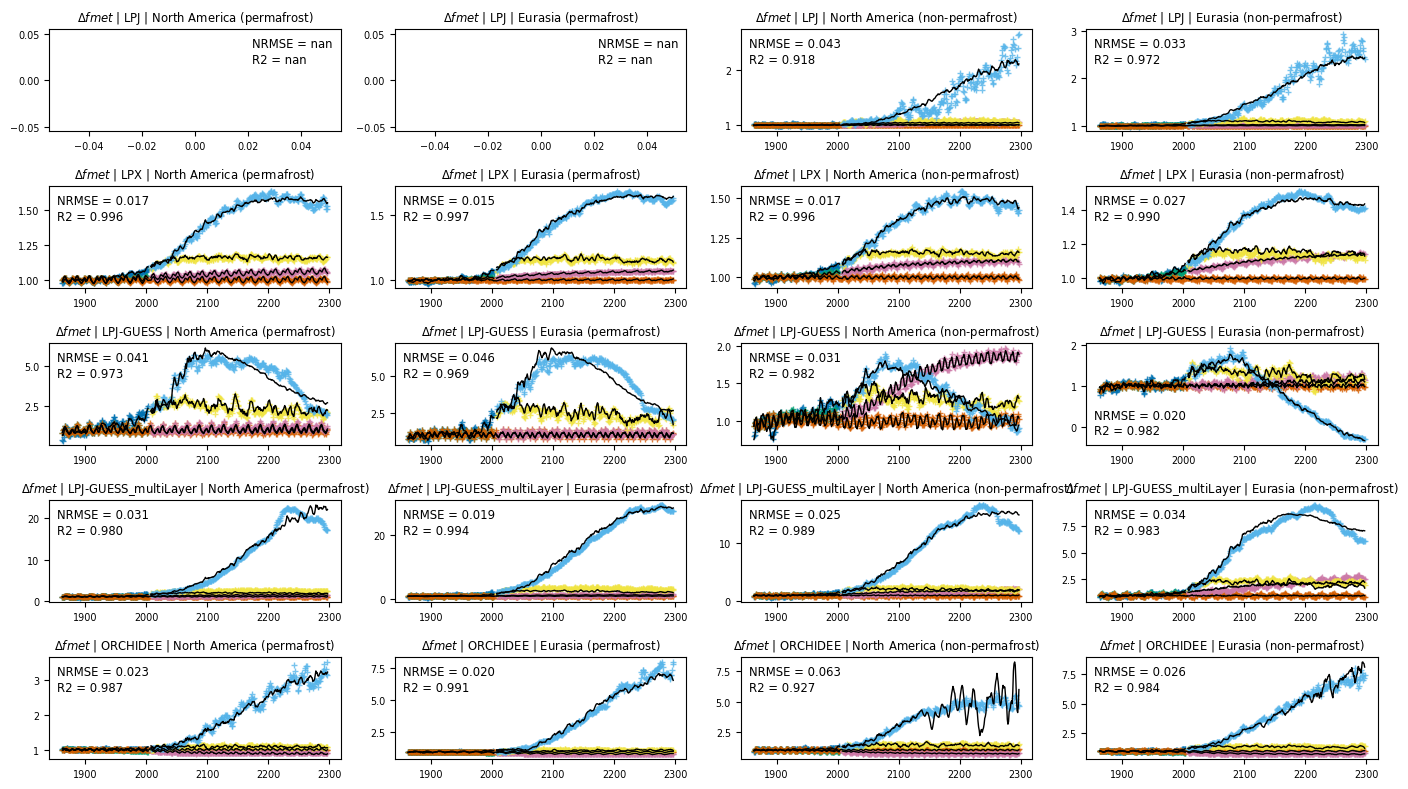

In [12]:
# plot for fmet
plt.figure(figsize=(14,8))
for m, mod in enumerate(ds.model):
    for r, reg in enumerate(ds.region):
        y_ref = ds.fch4_ref.sel(model=mod, region=reg)
        y_mod = ds.fch4_mod.sel(model=mod, region=reg)
        ax = plt.subplot2grid((len(ds.model), len(ds.region)), (m, r))
        plot_calib(y_ref, y_mod)
        plt.title(r'$\Delta fmet$ | {0} | {1}'.format(mod.values, reg.values), fontsize='small')
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.30, hspace=0.50)
plt.tight_layout()
plt.savefig(path_fig + 'figure_SI6.png', dpi=300)
# save as pdf
plt.savefig(path_fig + 'figure_SI6.pdf', dpi=300)
